Connected to spyice (Python 3.12.6)

# Algae Model : Study of Photosynthetic rate

## 1.0 Introduction

The jupyter notebook demonstrates different stressors of the photosynthetic model as a part of the algae biogeochemical process model. Physical stressors considered in the model are salt, temperature, light, and nutrient intake affect the photosynthetic rate. The photosynthetic rate $\mu$ is a parametric model and the associated stressors affecting the system also represented by empiral formulations. The photosynthetic rate along the sea ice vertical column follows a Gaussian distribution majorly influenced by the salinity model which is a Gaussian model followed by exponential temperature function, hyperbolic tangential photosynthetic active region (PAR) and fraction nutrient limitation. 

$\mu = \mu_m f_t f_s L_n L_{PAR}$

NOTE: For the purpose of testing, field variables like T, S and C are considered to be monotonically increasing linear functions and do not correspond to the values at the vertical column. T, S and C are mapped one-to-one (injective functions). Therefore, they do not carry any physical meaning as the given range is only to understand the nature of the emperical functions

In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import warnings

# Suppress runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [ ]:
# parameters list and default values

# initial values for the sliders 
# salinity
init_s_min = 1
init_s_max = 250
# temperature
init_t_min = -100
init_t_max = 100
# brine concentration
init_c_min = 0.01
init_c_max = 100
init_k = 1.6  # nitrogen
# depth in m
init_z_min = 0
init_z_max = 10
init_z = 0.1

# field parameters as a range of values 
# temperature
T_c = np.linspace(-25, 1, 150)
# temperature constant
r_g = 0.0633

## 2.0 Salinity Dependence

The Salinity dependence following a Gaussian distribution is given by, 

 $f_s = exp[-(2.16 - 8.3X10^{-5}. S_{br}^{2.11} - 0.55 ln(Sbr))^{2}]$

 where $S_{br}$ is brine salinity in the sea ice column

In [2]:
def f_s_salinity(s_min, s_max):
    """
    Calculate the salinity function f_s as a function of salinity.
    The equation used is f_s = exp(-((2.16 - a - b) ** 2)), where:
    - a = 8.3 * 10 ** (-5) * s ** 2.11
    - b = 0.55 * log(s)
    - s is the salinity in g kg^-1
    
    Parameters:
    s_min (float): Minimum salinity in g kg^-1.
    s_max (float): Maximum salinity in g kg^-1.

    Returns:
    numpy.ndarray: Salinity function f
    """
    s_br = np.linspace(s_min, s_max, 150)
    a_br = 8.3 * 10 ** (-5) * np.power(s_br, 2.11)
    b_br = 0.55 * np.log(s_br)
    f_s = np.exp(-((2.16 - a_br - b_br) ** 2))

    return f_s

# update salinity function based on the sliders on the plot
def update_salinity(s_min, s_max):
    fig, ax = plt.subplots()
    plt.grid()
    (line,) = ax.plot(
        np.linspace(init_s_min, init_s_max, 150), f_s_salinity(s_min, s_max), lw=2
    )
    ax.set_xlabel("Salinity in $g$ $kg^{-1}$")
    ax.set_ylabel("$f_s$")
    ax.set_title("Salinity function")
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line.set_ydata(f_s_salinity(s_min, s_max))
    line.set_xdata(np.linspace(init_s_min, init_s_max, 150))
    fig.canvas.draw_idle()


In [3]:
# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.

s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=init_s_min, max=init_s_max, step=0.1, description="s_min"
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=init_s_min, max=init_s_max, step=0.1, description="s_max"
)

# Create reset button
reset_button_salinity = widgets.Button(description="Reset")


def reset_salinity(event):
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max


reset_button_salinity.on_click(reset_salinity)

# Create an interactive plot with the `update_salinity` function and the sliders.
interactive_plot_salinity = widgets.interact(
    update_salinity, s_min=s_min_widget, s_max=s_max_widget
)

# Display the interactive plot and the reset button
display(interactive_plot_salinity, reset_button_salinity)

interactive(children=(FloatSlider(value=1.0, description='s_min', max=250.0, min=1.0), FloatSlider(value=250.0…

<function __main__.update_salinity(s_min, s_max)>

Button(description='Reset', style=ButtonStyle())

## 3.0 Temperature dependence

The exponential temperature function $f_T$, 

$f_T = e^{r_g T_c}$
with $T_c$ being the temperature in $\degree $ celsius, $r_g = 0.0633 \degree C$

Text(0.5, 1.0, 'Temperature function')

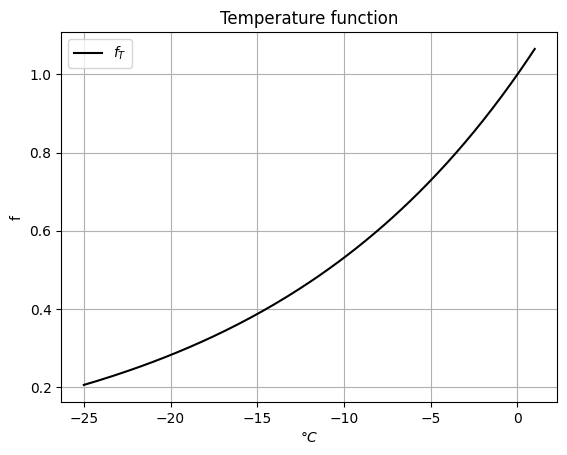

In [ ]:
f_t = np.exp(r_g * T_c)

plt.grid()
# plt.plot(T_c, f_ts, 'r',label='$f_{TS}$')
plt.plot(T_c, f_t, "black", label=r"$f_T$")
plt.legend()
plt.xlabel(r"$\degree C$")
plt.ylabel(r"f")
plt.title(r"Temperature function")


In [5]:
def ft_temperature(t_min, t_max):
    """
    Model temperature function f_t as an exponential function of temperature.

    Parameters:
    t_min (float): Minimum temperature in degrees Celsius.
    t_max (float): Maximum temperature in degrees Celsius.

    Returns:
    numpy.ndarray: Temperature function f_t
    
    """
    T_c = np.linspace(t_min, t_max, 150)
    r_g = 0.0633
    f_t = np.exp(r_g * T_c)

    return f_t

### 3.1 $f_s \cdot f_t $ dependence

multiplicative dependence of photosynthetic rate as function of salinity and temperature $\mu(T, S)$

In [6]:
def fs_ft(t_min, t_max, s_min, s_max):
    """
    Calculate the temperature x salinity function f_s * f_t.
    The equation used is f_s * f_t = f_t * f_s, where:
    - f_t = exp(r_g * T_c)
    - f_s = exp(-((2.16 - a - b) ** 2)), where:
        - a = 8.3 * 10 ** (-5) * s ** 2.11
        - b = 0.55 * log(s)
        - s is the salinity in g kg^-1
    - r_g = 0.0633

    Parameters:
    t_min (float): Minimum temperature in degrees Celsius.

    Returns:
    numpy.ndarray: Temperature x salinity function f_s * f_t
    """
    T_c = np.linspace(t_min, t_max, 150)
    r_g = 0.0633
    f_t = np.exp(r_g * T_c)
    f_s = f_s_salinity(s_min, s_max)

    return f_t * f_s

def update_fs_ft(t_min, t_max, s_min, s_max):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    for ax in axs.flat:
        ax.grid(True)
    ax1, ax2 = axs[0], axs[1]
    x_axis = np.linspace(init_t_min, init_t_max, 150)
    x2_axis = np.linspace(init_s_min, init_s_max, 150)
    (line1,) = ax1.plot(np.linspace(t_min, t_max, 150), fs_ft(t_min, t_max, s_min, s_max), lw=2)
    (line2,) = ax2.plot(np.linspace(s_min, s_max, 150), fs_ft(t_min, t_max, s_min, s_max), lw=2)
    ax1.set_xlabel(r"Temperature in $\degree C$")
    ax1.set_ylabel(r"$f_s \cdot f_t$")
    ax1.set_title("temperature x salinity function")
    ax2.set_xlabel(r"Salinity in $g$ $kg^{-1}$")
    ax2.set_ylabel(r"$f_s \cdot f_t$")
    ax2.set_title(r"temperature x salinity function")
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line1.set_ydata(fs_ft(t_min, t_max, s_min, s_max))
    line1.set_xdata(np.linspace(t_min, t_max, 150))
    line2.set_ydata(fs_ft(t_min, t_max, s_min, s_max))
    line2.set_xdata(np.linspace(s_min, s_max, 150))
    fig.canvas.draw_idle()


In [7]:
# ui widgets
# salinity min and max
s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=init_s_min, max=init_s_max, step=0.1, description="s_min"
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=init_s_min, max=init_s_max, step=0.1, description="s_max"
)
# temperature min and max
t_min_widget = widgets.FloatSlider(
    value=init_t_min, min=-100, max=100, step=0.1, description="t_min"
)
t_max_widget = widgets.FloatSlider(
    value=init_t_max, min=-100, max=100, step=0.1, description="t_max"
)
# reset
reset_button_salinity_temperature = widgets.Button(description="Reset")


def reset_salinity_temperature(event):
    # salinity
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max
    # temperature
    t_min_widget.value = init_t_min
    t_max_widget.value = init_t_max


reset_button_salinity.on_click(reset_salinity)

interactive_plot_salinity_temperature = widgets.interact(
    update_fs_ft,
    t_min=t_min_widget,
    t_max=t_max_widget,
    s_min=s_min_widget,
    s_max=s_max_widget,
)

# display(fig.canvas)
display(interactive_plot_salinity_temperature, reset_button_salinity_temperature)

interactive(children=(FloatSlider(value=-100.0, description='t_min', min=-100.0), FloatSlider(value=100.0, des…

<function __main__.update_fs_ft(t_min, t_max, s_min, s_max)>

Button(description='Reset', style=ButtonStyle())

### 3.2 Check for tolerance f_ts

The combined temperature and salinity effects define a window of temperature tolerance of ice algae defined by $f_{TS} = f_T f_S > 0.5 $


In [8]:
# f_ts = f_t * f_s
# assert f_ts.any() < 0.5, "f_ts should be greater than 0.5"

## 4.0 Nutrient limitation

$L_N = \frac{C_N^{br}}{k_N + C_N^{br}}$ with 

$k_N = 1.6 \mu M $, half saturation constant for nitrogen $\\$
$k_{Si} = 3.9 \mu M $, half saturation constant for Silicon $\\$
$k_P = 0.24 \mu M $, half saturation constant for Phosphorus


In [9]:
def nutrient_function(c_min, c_max, k):
    """A function to calculate the nutrient function as a function of nutrient concentration.
    The equation used is l_n = c_n / (k_n + c_n), where:
    - c_n is the nutrient concentration in mmol m^-3
    - k_n = 1.6 micrometers
    - k_si = 3.9 micrometers
    - k_p = 0.24 micrometers
    - l_n = c_n / (k_n + c_n)

    Parameters:
    c_min (float): Minimum nutrient concentration in mmol m^-3.
    c_max (float): Maximum nutrient concentration in mmol m^-3.
    k (float): Nutrient concentration in mmol m^-3.

    Returns:
    numpy.ndarray: Nutrient function l_n
    """
    # c in mmol m-3
    c_n = np.linspace(c_min, c_max, 150)
    k_n = 1.6  # in micrometers
    k_si = 3.9  # in micrometers
    k_p = 0.24  # in micrometers
    l_n = c_n / (k_n + c_n)
    l_si = c_n / (k_si + c_n)
    l_p = c_n / (k_p + c_n)
    # nutrient for k
    l_random = c_n / (k + c_n)

    return l_random

def update_nutrients(c_min, c_max, k):
    fig, ax = plt.subplots()
    plt.grid()
    x_axis = np.linspace(init_c_min, init_c_max, 150)
    (line,) = ax.plot(x_axis, nutrient_function(c_min, c_max, k), lw=2)
    ax.set_xlabel(r"$C_N^{br}$ in $m mol m^{-3}$")
    ax.set_ylabel(r"$l_n$")
    ax.set_title("Nutrient function")
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line.set_ydata(nutrient_function(c_min, c_max, k))
    line.set_xdata(x_axis)
    fig.canvas.draw_idle()

In [10]:
# ui widgets
# salinity min and max
c_min_widget = widgets.FloatSlider(
    value=init_c_min, min=init_c_min, max=init_c_max, step=0.1, description="c_min"
)
c_max_widget = widgets.FloatSlider(
    value=init_c_max, min=init_c_min, max=init_c_max, step=0.1, description="c_max"
)
k_widget = widgets.FloatSlider(
    value=init_k, min=0.01, max=10, step=0.1, description="k"
)
# reset
reset_button_nutrient = widgets.Button(description="Reset")


def reset_nutrient(event):
    # salinity
    c_min_widget.value = init_c_min
    c_max_widget.value = init_c_max
    k_widget.value = init_k


reset_button_nutrient.on_click(reset_nutrient)

interactive_plot_nutrient = widgets.interact(
    update_nutrients, c_min=c_min_widget, c_max=c_max_widget, k=k_widget
)

# display(fig.canvas)
display(interactive_plot_nutrient, reset_button_nutrient)

interactive(children=(FloatSlider(value=0.01, description='c_min', min=0.01), FloatSlider(value=100.0, descrip…

<function __main__.update_nutrients(c_min, c_max, k)>

Button(description='Reset', style=ButtonStyle())

### 4.1 $f_s \cdot f_t \cdot l_n$ plot

multiplicative dependence of photosynthetic rate as a function of salinity, temperature and nutrient limitation $\mu(T,S,N)$

In [23]:
def fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k: float):
    """
    Calculate the salinity x temperature x nutrient function f_s * f_t * l_n.
    The equation used is f_s * f_t * l_n = f_s * f_t * l_n, where:
    - f_s = exp(-((2.16 - a - b) ** 2)), where:
        - a = 8.3 * 10 ** (-5) * s ** 2.11
        - b = 0.55 * log(s)
        - s is the salinity in g kg^-1

    - f_t = exp(r_g * T_c)
    - r_g = 0.0633
    - T_c is the temperature in degrees Celsius

    - l_n = c_n / (k_n + c_n), where:
        - c_n is the nutrient concentration in mmol m^-3
        - k_n = 1.6 micrometers

    Parameters:
    s_min (float): Minimum salinity in g kg^-1.
    s_max (float): Maximum salinity in g kg^-1.
    t_min (float): Minimum temperature in degrees Celsius.
    t_max (float): Maximum temperature in degrees Celsius.
    c_min (float): Minimum nutrient concentration in mmol m^-3.
    c_max (float): Maximum nutrient concentration in mmol m^-3.
    k (float): Nutrient concentration in mmol m^-3.

    Returns:
    numpy.ndarray: Salinity x temperature x nutrient function f_s * f_t * l_n
    """
    fs_ft_ = fs_ft(t_min, t_max, s_min, s_max)
    fs_ft_ln_ = fs_ft_ * nutrient_function(c_min, c_max, k)

    return fs_ft_ln_


def update_fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k: float):
    fig, axs = plt.subplots(2,2, figsize=(16, 12))
    for ax in axs.flat:
        ax.grid(True)
    x_axis = np.linspace(init_t_min, init_t_max, 150)
    x2_axis = np.linspace(init_s_min, init_s_max, 150)
    x3_axis = np.linspace(init_c_min, init_c_max, 150)
    ax1, ax2, ax3, ax4 = axs[0,0], axs[0,1], axs[1,0], axs[1,1]
    fig.delaxes(ax4)
    (line1,) = ax1.plot(
        np.linspace(t_min, t_max, 150), fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k), lw=2
    )
    (line2,) = ax2.plot(
        np.linspace(s_min, s_max, 150), fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k), lw=2
    )
    (line3,) = ax3.plot(
        np.linspace(c_min, c_max, 150), fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k), lw=2
    )
    ax1.set_xlabel(r"Temperature in $\degree C$")
    ax1.set_ylabel(r"$f_s \cdot f_t \cdot l_n$")
    ax1.set_title("salinity-temperature-nutrient")

    ax2.set_xlabel(r"Salinity in $g$ $kg^{-1}$")
    ax2.set_ylabel(r"$f_s \cdot f_t \cdot l_n$")
    ax2.set_title("salinity-temperature-nutrient")

    ax3.set_xlabel(r"$C_N^{br}$ in $m mol m^{-3}$")
    ax3.set_ylabel(r"$f_s \cdot f_t \cdot l_n$")
    ax3.set_title("salinity-temperature-nutrient")

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line1.set_ydata(fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k))
    line1.set_xdata(np.linspace(t_min, t_max, 150))
    line2.set_ydata(fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k))
    line2.set_xdata(np.linspace(s_min, s_max, 150))
    line3.set_ydata(fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k))
    line3.set_xdata(np.linspace(c_min, c_max, 150))

    fig.canvas.draw_idle()


In [24]:
# ui widgets
# salinity min and max
s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=init_s_min, max=init_s_max, step=0.1, description="s_min"
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=init_s_min, max=init_s_max, step=0.1, description="s_max"
)
# temperature min and max
t_min_widget = widgets.FloatSlider(
    value=init_t_min, min=-100, max=100, step=0.1, description="t_min"
)
t_max_widget = widgets.FloatSlider(
    value=init_t_max, min=-100, max=100, step=0.1, description="t_max"
)
# nutrient
c_min_widget = widgets.FloatSlider(
    value=init_c_min, min=init_c_min, max=init_c_max, step=0.1, description="c_min"
)
c_max_widget = widgets.FloatSlider(
    value=init_c_max, min=init_c_min, max=init_c_max, step=0.1, description="c_max"
)
k_widget = widgets.FloatSlider(
    value=init_k, min=0.01, max=10, step=0.1, description="k"
)
# reset
reset_button_salinity_temperature_nutrient = widgets.Button(description="Reset")


def reset_salinity_temperature_nutrient(event):
    # salinity
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max
    # temperature
    t_min_widget.value = init_t_min
    t_max_widget.value = init_t_max
    # nutrient
    c_min_widget.value = init_c_min
    c_max_widget.value = init_c_max
    k_widget.value = init_k


reset_button_salinity_temperature_nutrient.on_click(reset_salinity_temperature_nutrient)

interactive_plot_salinity_temperature_nutrient = widgets.interact(
    update_fs_ft_ln,
    s_min=s_min_widget,
    s_max=s_max_widget,
    t_min=t_min_widget,
    t_max=t_max_widget,
    c_min=c_min_widget,
    c_max=c_max_widget,
    k=k_widget,
)

# display(fig.canvas)
display(
    interactive_plot_salinity_temperature_nutrient,
    reset_button_salinity_temperature_nutrient,
)

interactive(children=(FloatSlider(value=1.0, description='s_min', max=250.0, min=1.0), FloatSlider(value=250.0…

<function __main__.update_fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k: float)>

Button(description='Reset', style=ButtonStyle())

## 5.0 Light limitation

$L_{PAR} = tanh(\frac{\alpha PAR}{P_m})$

$P_m = \mu f_S f_T L_N / r_C^{Chl} $

$ r_C^{Chl} = \left[r_C^{Chl} |_{max} - (r_C^{Chl} |_{max} - r_C^{Chl} |_{min}) min (\frac{PAR}{E}, 1) \right] L_N$

replace $E_k = P_m/\alpha$



### 5.1 PAR function

$PAR = 4.91 I(z) \\$
$I(z) = I_0 e^{-k z}  \\$
$I_0 = i_0 (1- alpha) F_{sw}  \\$ where $i_0 = 0.17$


In [27]:
def PAR(z):
    """
    Calculate the Photosynthetically Active Radiation (PAR) at a given depth in ice.
    The equation used is PAR = 4.91 * I(z), where I(z) = I_0 * exp(-kappa * z).
    The constants used are:
    - kappa = 1.5 m^-1
    - i_0 = 0.17 for snow free ice and =0 for snow covered ice
    - alpha = 1e-4 g C (g Chla h micro E m-2 s-1)^-1
    - F_s_w = 5 W m^-2 incoming solar irradiance 1361
    - I_0 = i_0 * (1 - alpha) * F_s_w
    - PAR = 4.91 * I(z)

    Parameters:
    z (float): Depth in ice (m).

    Returns:
    float: PAR at the given depth in ice (W m^-2).
    """
    kappa = 1.5  # in m^-1
    i_0 = 0.17  # for snow free ice and =0 for snow covered ice
    alpha = 1e-4  # in g C (g Chla h micro E m-2 s-1)-1
    F_s_w = 5  # in W m-2 incoming solar irradiance 1361 https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Solar_irradiance&ved=2ahUKEwiL5Z2Qw_6JAxV30wIHHWQXD4AQFnoECCEQAw&usg=AOvVaw3cpr_oSPFpcgj7Ny50mW76
    I_0 = i_0 * (1 - alpha) * F_s_w
    I = lambda z: I_0 * np.exp(-kappa * z)  # z is the depth in ice
    PAR = lambda z: 4.91 * I(z)  # in W m-2

    return PAR(z)

# Uses PAR(z) to calculate the PAR at different depths in ice.
def calculate_PAR(z_min, z_max):
    kappa = 1.5  # in m^-1
    i_0 = 0.17  # for snow free ice and =0 for snow covered ice
    alpha = 1e-4  # in g C (g Chla h micro E m-2 s-1)-1
    F_s_w = 5  # in W m-2 incoming solar irradiance 1361 https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Solar_irradiance&ved=2ahUKEwiL5Z2Qw_6JAxV30wIHHWQXD4AQFnoECCEQAw&usg=AOvVaw3cpr_oSPFpcgj7Ny50mW76
    I_0 = i_0 * (1 - alpha) * F_s_w
    I = lambda z: I_0 * np.exp(-kappa * z)  # z is the depth in ice
    PAR = lambda z: 4.91 * I(z)  # in W m-2
    z_depth = np.linspace(z_min, z_max, 150)
    PAR_arr = [PAR(i) for i in z_depth]

    return np.array(PAR_arr)

# Uses PAR(z) to update with the slider values in the plot 
def update_PAR(z_min, z_max):
    fig, ax = plt.subplots()
    plt.grid()
    x_axis = np.linspace(z_min, z_max, 150)
    (line,) = ax.plot(calculate_PAR(z_min, z_max), np.linspace(z_min, z_max, 150), lw=2)
    ax.set_ylabel("depth in $m$")
    ax.set_xlabel("PAR in $W m^{-2}$")
    ax.set_title("PAR function")
    ax.invert_yaxis()
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line.set_xdata(calculate_PAR(z_min, z_max))
    line.set_ydata(np.linspace(z_min, z_max, 150))
    fig.canvas.draw_idle()


In [28]:
# ui widgets
# salinity min and max
z_min_widget = widgets.FloatSlider(
    value=init_z_min, min=init_z_min, max=init_z_max, step=0.1, description="z_min"
)
z_max_widget = widgets.FloatSlider(
    value=init_z_max, min=init_z_min, max=init_z_max, step=0.1, description="z_max"
)
# reset
reset_button_PAR = widgets.Button(description="Reset")


def reset_PAR(event):
    # salinity
    z_min_widget.value = init_z_min
    z_max_widget.value = init_z_max


reset_button_PAR.on_click(reset_PAR)

interactive_plot_PAR = widgets.interact(
    update_PAR, z_min=z_min_widget, z_max=z_max_widget
)

# display(fig.canvas)
display(interactive_plot_PAR, reset_button_PAR)

interactive(children=(FloatSlider(value=0.0, description='z_min', max=10.0), FloatSlider(value=10.0, descripti…

<function __main__.update_PAR(z_min, z_max)>

Button(description='Reset', style=ButtonStyle())

### 5.2 $E_K$ plot where 

$P_m = \mu f_S f_T L_N / r_C^{Chl} $

$ r_C^{Chl} = \left[r_C^{Chl} |_{max} - (r_C^{Chl} |_{max} - r_C^{Chl} |_{min}) min (\frac{PAR}{E}, 1) \right] L_N$

replace $E_k = P_m/\alpha$



In [37]:
def Ek_light(s_min, s_max, t_min, t_max, c_min, c_max, k, z, alpha):
    """ 
    Calculate the light limitation Ek as a function of depth in ice.
    The equation used is Ek = P_m / alpha, where:
    - P_m = mu_m * fs * ft * ln / r_chl_c_par
    - mu_m = 2e-5 in s^-1
    - E = 0.5 in micro E m-2 s-1
    - alpha = 1e-4 in g C (g Chla h micro E m-2 s-1)-1
    - r_chl_c_max = 0.05
    - r_chl_c_min = 0.01
    - ln = c_n / (k_n + c_n)
    - fs = exp(-((2.16 - a - b) ** 2))
    - ft = exp(r_g * T_c)
    - r_chl_c_par = r_chl_c_max - (r_chl_c_max - r_chl_c_min) * min(PAR / E, 1) * ln
    - P_m = mu_m * fs * ft * ln / r_chl_c_par
    - E_k = P_m / alpha

    Parameters:
    s_min (float): Minimum salinity in g kg^-1.
    s_max (float): Maximum salinity in g kg^-1.
    t_min (float): Minimum temperature in degrees Celsius.
    t_max (float): Maximum temperature in degrees Celsius.
    c_min (float): Minimum nutrient concentration in mmol m^-3.
    c_max (float): Maximum nutrient concentration in mmol m^-3.
    k (float): Nutrient concentration in mmol m^-3.
    z (float): Depth in ice (m).
    alpha (float): in g C (g Chla h micro E m-2 s-1)-1

    Returns:
    float: Light limitation Ek at the given depth in ice.
    """

    mu_m = 2e-5  # in s^-1
    E = 0.5  # in micro E m-2 s-1
    # alpha = 1e-4  # in g C (g Chla h micro E m-2 s-1)-1
    r_chl_c_max = 0.05
    r_chl_c_min = 0.01

    ln = nutrient_function(c_min, c_max, k)
    fs_ft_ln_ = fs_ft_ln(
        s_min, s_max, t_min, t_max, c_min, c_max, k
    )

    PAR_div_E = lambda _z: PAR(_z) / E  # noqa: E731
    
    r_chl_c_par = (  # noqa: E731
        lambda _z: r_chl_c_max
        - (r_chl_c_max - r_chl_c_min) * np.min([np.min(PAR_div_E(_z)), 1]) * ln
    )

    P_m_par = lambda _z: mu_m * fs_ft_ln_ / r_chl_c_par(_z)  # noqa: E731

    E_k = lambda _z: P_m_par(_z) / alpha  # noqa: E731

    return E_k(z)

def Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index):
    mu_m = 2e-5  # in s^-1
    E = 0.5  # in micro E m-2 s-1
    # alpha = 1e-4  # in g C (g Chla h micro E m-2 s-1)-1
    r_chl_c_max = 0.05
    r_chl_c_min = 0.01

    ln = nutrient_function(c_min, c_max, k)
    fs_ft_ln_ = fs_ft_ln(
        s_min, s_max, t_min, t_max, c_min, c_max, k
    )

    PAR_div_E = lambda _z: PAR(_z) / E  # noqa: E731
    
    r_chl_c_par = (  # noqa: E731
        lambda _z: r_chl_c_max
        - (r_chl_c_max - r_chl_c_min) * np.min([np.min(PAR_div_E(_z)), 1]) * ln
    )

    P_m_par = lambda _z: mu_m * fs_ft_ln_[index] / r_chl_c_par(_z)[index]  # noqa: E731

    E_k = lambda _z: P_m_par(_z) / alpha  # noqa: E731

    z_depth = np.linspace(z_min, z_max, 150)
    E_k_arr = [E_k(i) for i in z_depth]

    return np.array(E_k_arr)

def Ek_light_tanh(PAR_arr:np.array, Ek_arr:np.array):
    """ 
    
    Calculate the light limitation Ek as a function of depth in ice.
    The equation used is Ek = P_m / alpha, where:
    - P_m = mu_m * fs * ft * ln / r_chl_c_par
    - mu_m = 2e-5 in s^-1
    - E = 0.5 in micro E m-2 s-1
    - alpha = 1e-4 in g C (g Chla h micro E m-2 s-1)-1
    - r_chl_c_max = 0.05
    - r_chl_c_min = 0.01
    - ln = c_n / (k_n + c_n)
    - fs = exp(-((2.16 - a - b) ** 2))
    - ft = exp(r_g * T_c)
    - r_chl_c_par = r_chl_c_max - (r_chl_c_max - r_chl_c_min) * min(PAR / E, 1) * ln
    - P_m = mu_m * fs * ft * ln / r_chl_c_par
    - E_k = P_m / alpha

    Parameters:
    PAR_arr (np.array): PAR at the given depth in ice.
    Ek_arr (np.array): Light limitation Ek at the given depth in ice.

    Returns:
    np.array: Light limitation Ek at the given depth in ice.
    
    """

    return np.tanh(PAR_arr / Ek_arr)

def update_E_k(s_min, s_max, t_min, t_max, c_min, c_max, k, z, z_min, z_max, alpha, index):
    z_depth = np.linspace(z_min, z_max, 150)
    t_list = np.linspace(t_min, t_max, 150)
    s_list = np.linspace(s_min, s_max, 150)
    c_list = np.linspace(c_min, c_max, 150)

    print(f"index: {index}")
    print(f"Temperature[index]: {t_list[index]}")
    print(f"Salinity[index]: {s_list[index]}")
    print(f"Concentration[index]: {c_list[index]}")
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    for ax in axs.flat:
        ax.grid(True)
    ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1,1]
    (line_1,) = ax1.plot(
         Ek_light(s_min, s_max, t_min, t_max, c_min, c_max, k,z, alpha), lw=2, color='black'
    )
    line_2, = ax2.plot(
        z_depth, Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index) , lw=2, color='black'
    )   
    line_3, = ax3.plot(calculate_PAR(z_min, z_max), Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index), lw=2, color='black')
    line_4, = ax4.plot(calculate_PAR(z_min, z_max), Ek_light_tanh(calculate_PAR(z_min, z_max), Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index)), lw=2, color='red')
    ax1.set_ylabel(r"$E_k$")
    ax1.set_xlabel("index")
    ax2.set_ylabel(r"$E_k$")
    ax2.set_xlabel("depth in $m$")
    ax3.set_ylabel(r"$E_k$")
    ax3.set_xlabel("PAR in $W m^{-2}$")
    ax4.set_ylabel(r"$L_{PAR} = tanh(PAR/E_k)$")
    ax4.set_xlabel("PAR in $W m^{-2}$")
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line_1.set_ydata(Ek_light(s_min, s_max, t_min, t_max, c_min, c_max, k, z, alpha))
    line_2.set_ydata(Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index))
    line_3.set_xdata(calculate_PAR(z_min, z_max))
    line_3.set_ydata(Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index))
    line_4.set_xdata(calculate_PAR(z_min, z_max))
    line_4.set_ydata(Ek_light_tanh(calculate_PAR(z_min, z_max), Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index)))
    fig.canvas.draw_idle()



In [38]:
# ui widgets
# salinity min and max
s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=0, max=200, step=0.1, description="minimum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'} 
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=0, max=250, step=0.1, description="maximum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# temperature min and max
t_min_widget = widgets.FloatSlider(
    value=init_t_min, min=-30, max=100, step=0.1, description=r"minimum temperature in $\degree C$", style={'description_width': 'initial'}, layout={'width': '500px'}
)
t_max_widget = widgets.FloatSlider(
    value=init_t_max, min=-100, max=100, step=0.1, description=r"maximum temperature in $\degree C$", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# nutrient
c_min_widget = widgets.FloatSlider(
    value=init_c_min, min=init_c_min, max=init_c_max, step=0.1, description=r"minimum concentration in $mmol m^{-3}$", style={'description_width': 'initial'}, layout={'width': '500px'}
)
c_max_widget = widgets.FloatSlider(
    value=init_c_max, min=init_c_min, max=init_c_max, step=0.1, description=r"maximum concentration in $mmol m^{-3}$", style={'description_width': 'initial'}, layout={'width': '500px'}
)
k_widget = widgets.FloatSlider(
    value=init_k, min=0.01, max=10, step=0.1, description=r"half-saturation constant", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_widget = widgets.FloatSlider(
    value=init_z, min=init_z_min, max=init_z_max, step=0.1, description=r"sea-ice depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_min_widget = widgets.FloatSlider(
    value=init_z_min, min=init_z_min, max=init_z_max, step=0.1, description=r"minimum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_max_widget = widgets.FloatSlider(
    value=init_z_max, min=init_z_min, max=init_z_max, step=0.1, description=r"maximum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
alpha_widget = widgets.FloatSlider(
    value=1e-4, min=1e-5, max=1e-1, step=1e-5, description=r"photosynthesis efficiency $\alpha$", style={'description_width': 'initial'}, layout={'width': '500px'}
)
index_widget = widgets.IntSlider(
    value=0, min=0, max=149, step=1, description=r"index", style={'description_width': 'initial'}, layout={'width': '300px'}
)
# reset
reset_button_E_k = widgets.Button(description="Reset")

def reset_E_k(event):
    # salinity
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max
    # temperature
    t_min_widget.value = init_t_min
    t_max_widget.value = init_t_max
    # nutrient
    c_min_widget.value = init_c_min
    c_max_widget.value = init_c_max
    k_widget.value = init_k
    z_widget.value = init_z
    z_min_widget.value = init_z_min
    z_max_widget.value = init_z_max
    alpha_widget.value = 1e-4
    index_widget.value = 0


reset_button_E_k.on_click(reset_E_k)

interactive_plot_E_k = widgets.interact(
    update_E_k,
    s_min=s_min_widget,
    s_max=s_max_widget,
    t_min=t_min_widget,
    t_max=t_max_widget,
    c_min=c_min_widget,
    c_max=c_max_widget,
    k=k_widget,
    z=z_widget,
    z_min=z_min_widget,
    z_max=z_max_widget,
    alpha=alpha_widget,
    index=index_widget,
)

# display(fig.canvas)
display(
    interactive_plot_E_k,
    reset_button_E_k,
)

interactive(children=(FloatSlider(value=1.0, description='minimum salinity in g kg^-1', layout=Layout(width='5…

<function __main__.update_E_k(s_min, s_max, t_min, t_max, c_min, c_max, k, z, z_min, z_max, alpha, index)>

Button(description='Reset', style=ButtonStyle())

## 6.1 Photosynthetic rate $\mu = \mu_m f_t f_s L_n L_{PAR}$

In [40]:
def photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index):
    """
    Calculate the photosynthetic rate as a function of depth in ice.
    The equation used is mu = max_mu * fs * ft * ln * lpar, where:
    - max_mu = 2e-5 in s^-1
    - fs = exp(-((2.16 - a - b) ** 2)), where:
        - a = 8.3 * 10 ** (-5) * s ** 2.11
        - b = 0.55 * log(s)
        - s is the salinity in g kg^-1
    - ft = exp(r_g * T_c)
    - r_g = 0.0633
    - T_c is the temperature in degrees Celsius
    - ln = c_n / (k_n + c_n)
    - lpar = tanh(PAR / Ek)
    - Ek = P_m / alpha
    - P_m = mu_m * fs * ft * ln / r_chl_c_par
    - r_chl_c_par = r_chl_c_max - (r_chl_c_max - r_chl_c_min) * min(PAR / E, 1) * ln
    - E = 0.5 in micro E m-2 s-1
    - alpha = 1e-4 in g C (g Chla h micro E m-2 s-1)-1
    - mu = max_mu * fs * ft * ln * lpar

    Parameters:
    s_min (float): Minimum salinity in g kg^-1.
    s_max (float): Maximum salinity in g kg^-1.
    t_min (float): Minimum temperature in degrees Celsius.
    t_max (float): Maximum temperature in degrees Celsius.
    c_min (float): Minimum nutrient concentration in mmol m^-3.
    c_max (float): Maximum nutrient concentration in mmol m^-3.
    k (float): Nutrient concentration in mmol m^-3.
    z_min (float): Minimum depth in ice in m.
    z_max (float): Maximum depth in ice in m.
    alpha (float): in g C (g Chla h micro E m-2 s-1)-1
    index (int): index of the depth in ice.

    Returns:
    float: Photosynthetic rate at the given depth in ice.
    """
    PAR_arr = calculate_PAR(z_min, z_max)
    Ek_arr = Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index)
    lpar_arr = Ek_light_tanh(PAR_arr, Ek_arr)
    max_mu = 2e-5  # in s^-1
    mu = max_mu * fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k) * lpar_arr

    return mu

def update_photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index):
    z_depth = np.linspace(z_min, z_max, 150)
    t_list = np.linspace(t_min, t_max, 150)
    s_list = np.linspace(s_min, s_max, 150)
    c_list = np.linspace(c_min, c_max, 150)
    print(f"index: {index}")
    print(f"Temperature[index]: {t_list[index]}")
    print(f"Salinity[index]: {s_list[index]}")
    print(f"Concentration[index]: {c_list[index]}")
    
    fig, ax = plt.subplots()
    plt.grid()
    (line,) = ax.plot(
        z_depth, photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index), lw=2
    )
    ax.set_ylabel(r"$\mu$")
    ax.set_xlabel("depth in $m$")
    ax.set_title("Photosynthetic rate")
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line.set_ydata(photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index))
    line.set_xdata(z_depth)
    fig.canvas.draw_idle()

In [41]:
# ui widgets
# salinity min and max
s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=0, max=200, step=0.1, description="minimum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'}
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=0, max=250, step=0.1, description="maximum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# temperature min and max
t_min_widget = widgets.FloatSlider(
    value=init_t_min, min=-30, max=100, step=0.1, description="minimum temperature in °C", style={'description_width': 'initial'}, layout={'width': '500px'}
)
t_max_widget = widgets.FloatSlider(
    value=init_t_max, min=-100, max=100, step=0.1, description="maximum temperature in °C", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# nutrient
c_min_widget = widgets.FloatSlider(
    value=init_c_min, min=init_c_min, max=init_c_max, step=0.1, description="minimum concentration in mmol m^-3", style={'description_width': 'initial'}, layout={'width': '500px'}
)
c_max_widget = widgets.FloatSlider(
    value=init_c_max, min=init_c_min, max=init_c_max, step=0.1, description="maximum concentration in mmol m^-3", style={'description_width': 'initial'}, layout={'width': '500px'}
)
k_widget = widgets.FloatSlider(
    value=init_k, min=0.01, max=10, step=0.1, description="half-saturation constant", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_widget = widgets.FloatSlider(
    value=init_z, min=init_z_min, max=init_z_max, step=0.1, description="sea-ice depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_min_widget = widgets.FloatSlider(
    value=init_z_min, min=init_z_min, max=init_z_max, step=0.1, description="minimum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_max_widget = widgets.FloatSlider(
    value=init_z_max, min=init_z_min, max=init_z_max, step=0.1, description="maximum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
alpha_widget = widgets.FloatSlider(
    value=1e-4, min=1e-5, max=1e-1, step=1e-5, description="photosynthesis efficiency α", style={'description_width': 'initial'}, layout={'width': '500px'}
)
index_widget = widgets.IntSlider(
    value=0, min=0, max=149, step=1, description="index", style={'description_width': 'initial'}, layout={'width': '300px'}
)

# reset
reset_button_photosynthetic_rate = widgets.Button(description="Reset")


def reset_photosynthetic_rate(event):
    # salinity
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max
    # temperature
    t_min_widget.value = init_t_min
    t_max_widget.value = init_t_max
    # nutrient
    c_min_widget.value = init_c_min
    c_max_widget.value = init_c_max
    k_widget.value = init_k
    z_min_widget.value = init_z_min
    z_max_widget.value = init_z_max
    alpha_widget.value = 1e-4
    index_widget.value = 0


reset_button_photosynthetic_rate.on_click(reset_photosynthetic_rate)

interactive_plot_photosynthetic_rate = widgets.interact(
    update_photosynthetic_rate,
    s_min=s_min_widget,
    s_max=s_max_widget,
    t_min=t_min_widget,
    t_max=t_max_widget,
    c_min=c_min_widget,
    c_max=c_max_widget,
    k=k_widget,
    z_min=z_min_widget,
    z_max=z_max_widget,
    alpha=alpha_widget,
    index=index_widget,
)

# display(fig.canvas)
display(
    interactive_plot_photosynthetic_rate,
    reset_button_photosynthetic_rate,
)


interactive(children=(FloatSlider(value=1.0, description='minimum salinity in g kg^-1', layout=Layout(width='5…

<function __main__.update_photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index)>

Button(description='Reset', style=ButtonStyle())

### 6.2 $f(\mu, S, T, N)$ comparison plots

In [48]:
def update_fplots(s_min, s_max, t_min, t_max, c_min, c_max, k, z, z_min, z_max, alpha, index):
    t_list = np.linspace(t_min, t_max, 150)
    s_list = np.linspace(s_min, s_max, 150)
    c_list = np.linspace(c_min, c_max, 150)
    print(f"index: {index}")
    print(f"Temperature[index]: {t_list[index]}")
    print(f"Salinity[index]: {s_list[index]}")
    print(f"Concentration[index]: {c_list[index]}")

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    for ax in axs.flat:
        ax.grid(True)
    ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1,1]
    (line_1,) = ax1.plot(np.linspace(t_min, t_max, 150),
         Ek_light(s_min, s_max, t_min, t_max, c_min, c_max, k,z, alpha), lw=2, color='black', label=r'$\mu f_s F_t f_n/r_C^{Chl}$'
    )
    line_1_1, = ax1.plot(np.linspace(t_min, t_max, 150),
         f_s_salinity(s_min, s_max), lw=2, label='$f(S)$'
    )
    line_1_2, = ax1.plot(fs_ft(t_min, t_max, s_min, s_max), lw=2, label=r'$f(T,S)$')
    line_1_3, = ax1.plot(
        fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k), lw=2, label=r'$f(T,S,N)$'
    )
    line_1_4, = ax1.plot(
        photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index), lw=2, label=r'$f(T,S,N,PAR)$'
    )
    line_2, = ax2.plot(
        ft_temperature(t_min, t_max))   
    line_3, = ax3.plot(c_list, nutrient_function(c_min, c_max, k), lw=2, label='Nutrient')
    line_4, = ax4.plot(calculate_PAR(z_min, z_max), Ek_light_tanh(calculate_PAR(z_min, z_max), Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index)), lw=2, color='red', label='PAR')
    ax1.set_ylabel(r"$f$")
    ax1.set_xlabel(r"Temperature in \degree C")
    ax2.set_ylabel(r"$f_t$")
    ax2.set_xlabel(r"Temperature in \degree C")
    ax3.set_ylabel(r"$f_n$")
    ax3.set_xlabel(r"Temperature in \degree C$")
    ax4.set_ylabel(r"$L_{PAR} = tanh(PAR/E_k)$")
    ax4.set_xlabel(r"PAR in $W m^{-2}$")
    ax1.legend()
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    # The function to be called anytime a slider's value changes
    # Create the figure and the line that we will manipulate
    line_1.set_ydata(Ek_light(s_min, s_max, t_min, t_max, c_min, c_max, k, z, alpha))
    line_1_1.set_ydata(f_s_salinity(s_min, s_max))
    line_1_2.set_ydata(fs_ft(t_min, t_max, s_min, s_max))
    line_1_3.set_ydata(fs_ft_ln(s_min, s_max, t_min, t_max, c_min, c_max, k))
    line_1_4.set_ydata(photosynthetic_rate(s_min, s_max, t_min, t_max, c_min, c_max, k, z_min, z_max, alpha, index))
    line_2.set_ydata(ft_temperature(t_min, t_max))
    line_3.set_xdata(c_list)
    line_3.set_ydata(nutrient_function(c_min, c_max, k))
    line_4.set_xdata(calculate_PAR(z_min, z_max))
    line_4.set_ydata(Ek_light_tanh(calculate_PAR(z_min, z_max), Ek_light_z(s_min, s_max, t_min, t_max, c_min, c_max, z_min, z_max, k, alpha, index)))
    plt.legend()
    fig.canvas.draw_idle()



In [49]:
# ui widgets
# salinity min and max
s_min_widget = widgets.FloatSlider(
    value=init_s_min, min=0, max=200, step=0.1, description="minimum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'}
)
s_max_widget = widgets.FloatSlider(
    value=init_s_max, min=0, max=250, step=0.1, description="maximum salinity in g kg^-1", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# temperature min and max
t_min_widget = widgets.FloatSlider(
    value=init_t_min, min=-100, max=100, step=0.1, description="minimum temperature in °C", style={'description_width': 'initial'}, layout={'width': '500px'}
)
t_max_widget = widgets.FloatSlider(
    value=init_t_max, min=-100, max=100, step=0.1, description="maximum temperature in °C", style={'description_width': 'initial'}, layout={'width': '500px'}
)
# nutrient
c_min_widget = widgets.FloatSlider(
    value=init_c_min, min=init_c_min, max=init_c_max, step=0.1, description="minimum concentration in mmol m^-3", style={'description_width': 'initial'}, layout={'width': '500px'}
)
c_max_widget = widgets.FloatSlider(
    value=init_c_max, min=init_c_min, max=init_c_max, step=0.1, description="maximum concentration in mmol m^-3", style={'description_width': 'initial'}, layout={'width': '500px'}
)
k_widget = widgets.FloatSlider(
    value=init_k, min=0.01, max=10, step=0.1, description="half-saturation constant", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_widget = widgets.FloatSlider(
    value=init_z, min=init_z_min, max=init_z_max, step=0.1, description="sea-ice depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_min_widget = widgets.FloatSlider(
    value=init_z_min, min=init_z_min, max=init_z_max, step=0.1, description="minimum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
z_max_widget = widgets.FloatSlider(
    value=init_z_max, min=init_z_min, max=init_z_max, step=0.1, description="maximum depth in m", style={'description_width': 'initial'}, layout={'width': '500px'}
)
alpha_widget = widgets.FloatSlider(
    value=1e-4, min=1e-5, max=1e-1, step=1e-5, description="photosynthesis efficiency α", style={'description_width': 'initial'}, layout={'width': '500px'}
)
index_widget = widgets.IntSlider(
    value=0, min=0, max=149, step=1, description="index", style={'description_width': 'initial'}, layout={'width': '300px'}
)

# reset
reset_button_fcomparison = widgets.Button(description="Reset")


def reset_fcomparison(event):
    # salinity
    s_min_widget.value = init_s_min
    s_max_widget.value = init_s_max
    # temperature
    t_min_widget.value = init_t_min
    t_max_widget.value = init_t_max
    # nutrient
    c_min_widget.value = init_c_min
    c_max_widget.value = init_c_max
    k_widget.value = init_k
    z_min_widget.value = init_z_min
    z_max_widget.value = init_z_max
    z_widget.value = init_z
    alpha_widget.value = 1e-4
    index_widget.value = 0


reset_button_fcomparison.on_click(reset_fcomparison)

interactive_fplots = widgets.interact(
    update_fplots,
    s_min=s_min_widget,
    s_max=s_max_widget,
    t_min=t_min_widget,
    t_max=t_max_widget,
    c_min=c_min_widget,
    c_max=c_max_widget,
    k=k_widget,
    z=z_widget,
    z_min=z_min_widget,
    z_max=z_max_widget,
    alpha=alpha_widget,
    index=index_widget,
)

# display(fig.canvas)
display(
    interactive_fplots,
    reset_button_fcomparison,
)


interactive(children=(FloatSlider(value=1.0, description='minimum salinity in g kg^-1', layout=Layout(width='5…

<function __main__.update_fplots(s_min, s_max, t_min, t_max, c_min, c_max, k, z, z_min, z_max, alpha, index)>

Button(description='Reset', style=ButtonStyle())